# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Provide recommendations to improve SAT participation rates and scores, by making reference from SAT and ACT 2017 data trends across states.


## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_17 = pd.read_csv('./sat_2017.csv')  ### Please use a relative path next time. Reference the .csv file with respect
act_17 = pd.read_csv('./act_2017.csv')  ### to the current working directory. Current directory is ./ and since the files 
                                        ### are there we use ./sat_2017.csv

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

sat_17 outputs the average score of students who participated in math and evidence-based reading and writing. The total score of students who partipated in math and evidence-based reading and writing are summed. The number of students who took part in SAT are represented as a form of percentage of the total number of students, for each state.

act_17 outputs the average results of students who participated in math, english, reading, science and the average score of all four subjects (composite). The participation of the students is output as the percentage of the number of students who participated in ACT, out of the total number of students in that particular state.

#### 4a. Does the data look complete? 

Answer: The data looks complete, both dataframe do not have null values.

In [5]:
### might want to use act_17.isnull().sum() to confirm

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: SAT minimum score is 400, maximum score is 1600. ACT minimum score is 1, maximum score is 36.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [ ]:
### I'm not sure if you manually checked each row, but a scalable solution would be to simply check the math that 
### they are doing. For example,

cond = ~((df_sat2017["Total"] - 1 ) <= (df_sat2017["Math"] + df_sat2017["Evidence-Based Reading and Writing"])) & ((df_sat2017["Math"] + df_sat2017["Evidence-Based Reading and Writing"]) <= (df_sat2017["Total"] + 1))
df_sat2017[cond]

### cond is a list of booleans (True/False) which will immediately extract the rows where the math doesn't add up. 
### The +1 and -1 are necessary since they already do some rounding in the presented dataset.

In [6]:
sat_17.loc[20,'Math'] = 524 #change Maryland's math score to 524 
act_17.loc[21,'Science'] = 23.2 #change Maryland's science score to 23.2
act_17['Composite'] = act_17['Composite'].str.replace('20.2x', '20.2') #replace Wyoming's composite score from 20.2 x to 20.2

In [7]:
print(sat_17.loc[20,'Math']) 
print(act_17.loc[21,'Science']) 
print(act_17.loc[51,'Composite'])

524
23.2
20.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

sat_17: Columns with int type are 'Evidence-based Reading and Writing', 'Math' and 'Total'. Columns with str type are 'Participation' and 'State'. However, 'Participation' should be numeric type, instead of str. 

act_17: Columns with float type are 'English', 'Math', 'Reading' and 'Science'. Columns with str type are 'State', 'Participation' and 'Composite'. However, 'Participation' should be numeric type, instead of str, while 'Composite' should be float type instead of str.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
def convert_numeric(df):
    df=df.replace('%', '')
    df=pd.to_numeric(df)
    return df

In [11]:
sat_17['Participation'] = sat_17['Participation'].apply(convert_numeric)

In [12]:
act_17['Participation'] = act_17['Participation'].apply(convert_numeric)

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#all fixed in step 4c.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
def convert_numeric_2(df):
    df=pd.to_numeric(df)
    return df

act_17['Composite'] = act_17['Composite'].apply(convert_numeric_2)

- Display the data types again to confirm they are correct.

In [15]:
sat_17.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [16]:
act_17.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
sat_17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [18]:
sat_17.columns = map(str.lower, sat_17.columns)         ### Good
sat_17.columns = sat_17.columns.str.replace(" ", "_")
sat_17.columns = sat_17.columns.str.replace("participation", "sat_2017_participation")
sat_17.columns = sat_17.columns.str.replace("evidence-based_reading_and_writing", "sat_2017_evidence-based_reading_and_writing")
sat_17.columns = sat_17.columns.str.replace("math", "sat_2017_math")
sat_17.columns = sat_17.columns.str.replace("total", "sat_2017_total")
print(sat_17.columns)

Index(['state', 'sat_2017_participation',
       'sat_2017_evidence-based_reading_and_writing', 'sat_2017_math',
       'sat_2017_total'],
      dtype='object')


In [19]:
act_17.columns = map(str.lower, act_17.columns)
act_17.columns = act_17.columns.str.replace(" ", "_")
act_17.columns = act_17.columns.str.replace("participation", "act_2017_participation")
act_17.columns = act_17.columns.str.replace("english", "act_2017_english")
act_17.columns = act_17.columns.str.replace("math", "act_2017_math")
act_17.columns = act_17.columns.str.replace("reading", "act_2017_reading")
act_17.columns = act_17.columns.str.replace("science", "act_2017_science")
act_17.columns = act_17.columns.str.replace("composite", "act_2017_composite")
print(act_17.columns)

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite'],
      dtype='object')


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [148]:
act_17.drop(0, inplace = True) ### Good

KeyError: '[0] not found in axis'

In [149]:
act_17.head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8
6,Colorado,100,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31,25.5,24.6,25.6,24.6,25.2
8,Delaware,18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32,24.4,23.5,24.9,23.5,24.2
10,Florida,73,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [22]:
ACT_SAT_17 = pd.merge(act_17, sat_17, on='state')

In [23]:
ACT_SAT_17.head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,1201
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,1041
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,996
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,950
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,1017


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [24]:
ACT_SAT_17.to_csv('./combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [25]:
sat_18 = pd.read_csv('./sat_2018.csv')
act_18_updated = pd.read_csv('./act_2018_updated.csv')

In [26]:
sat_18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [27]:
#change Participation to numeric type, instead of str.
sat_18['Participation'] = sat_18['Participation'].apply(convert_numeric)

In [28]:
sat_18.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [29]:
act_18_updated.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [30]:
sat_18.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [31]:
#all column names to be lower case, remove spacing in column names and provide unique names to columns (except state)
sat_18.columns = map(str.lower, sat_18.columns)
sat_18.columns = sat_18.columns.str.replace(" ", "_")
sat_18.columns = sat_18.columns.str.replace("participation", "sat_2018_participation")
sat_18.columns = sat_18.columns.str.replace("evidence-based_reading_and_writing", "sat_2018_evidence-based_reading_and_writing")
sat_18.columns = sat_18.columns.str.replace("math", "sat_2018_math")
sat_18.columns = sat_18.columns.str.replace("total", "sat_2018_total")

In [32]:
sat_18.columns

Index(['state', 'sat_2018_participation',
       'sat_2018_evidence-based_reading_and_writing', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

In [150]:
#comparing with online 2018SAT results, Florida scores should be 522,493,1014, not 550,549,1099
sat_18.loc[9,'sat_2018_evidence-based_reading_and_writing'] = 522
sat_18.loc[9,'sat_2018_math'] = 493
sat_18.loc[9,'sat_2018_total'] = 1014

# Hawaii scores should be 550,549,1099, not 480,530,1010
sat_18.loc[11,'sat_2018_evidence-based_reading_and_writing'] = 550
sat_18.loc[11,'sat_2018_math'] = 549
sat_18.loc[11,'sat_2018_total'] = 1099

# Indiana scores should be 546,539,1086, not 542,532,1074
sat_18.loc[14,'sat_2018_evidence-based_reading_and_writing'] = 546
sat_18.loc[14,'sat_2018_math'] = 539
sat_18.loc[14,'sat_2018_total'] = 1086

# South Dakota total score should be 1241, not 1240
sat_18.loc[41,'sat_2018_total'] = 1241

# Utah scores should be 618,612,1230, not 480,530,1010
sat_18.loc[44,'sat_2018_evidence-based_reading_and_writing'] = 618
sat_18.loc[44,'sat_2018_math'] = 612
sat_18.loc[44,'sat_2018_total'] = 1230   ### Good effort

In [151]:
sat_18                                    ### Try not to do this if possible - doesn't work well with larger datasets

,state,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076
5,Colorado,100,519,506,1025
6,Connecticut,100,535,519,1053
7,Delaware,100,505,492,998
8,District of Columbia,92,497,480,977
9,Florida,56,522,493,1014


In [35]:
act_18_updated.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [36]:
act_18_updated.columns = map(str.lower, act_18_updated.columns)
act_18_updated.columns = act_18_updated.columns.str.replace(" ", "_")
act_18_updated.columns = act_18_updated.columns.str.replace("percentage_of_students_tested", "act_2018_participation")
act_18_updated.columns = act_18_updated.columns.str.replace("average_composite_score", "act_2018_composite")
act_18_updated.columns = act_18_updated.columns.str.replace("average_english_score", "act_2018_english")
act_18_updated.columns = act_18_updated.columns.str.replace("average_math_score", "act_2018_math")
act_18_updated.columns = act_18_updated.columns.str.replace("average_reading_score", "act_2018_reading")
act_18_updated.columns = act_18_updated.columns.str.replace("average_science_score", "act_2018_science")

In [37]:
act_18_updated.columns

Index(['state', 'act_2018_participation', 'act_2018_composite',
       'act_2018_english', 'act_2018_math', 'act_2018_reading',
       'act_2018_science'],
      dtype='object')

In [38]:
#Delaware's composite score does not tally with the average score of all sub-tests. 
#Delaware's composite score is changed from 23.2 to 23.7
act_18_updated.loc[7,'act_2018_composite'] = 23.7 
act_18_updated.loc[7,'act_2018_composite']

23.7

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [39]:
ACT_SAT_18 = pd.merge(act_18_updated, sat_18, on='state')

In [40]:
ACT_SAT_final = pd.merge(ACT_SAT_17, ACT_SAT_18, on='state')

In [41]:
ACT_SAT_final.to_csv('./final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [42]:
#Code:
ACT_SAT_final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.496078,20.988235,21.125490,22.015686,21.345098,45.745098,567.294118,557.254902,1124.666667
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.115558,2.446356,2.035765,2.167245,1.870114,37.314256,45.317676,48.887562,93.868561
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,497.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,535.000000,521.500000,1062.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,547.000000,1099.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.650000,23.700000,23.150000,24.100000,23.050000,77.500000,616.500000,600.500000,1220.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [43]:
#sd = np.std(col, ddof=1)
import math
import numpy as np
def std_dev(col):
    sd = 0.0                                    ### Might want to call it something else instead of sd since it's confusing
    col_mean = col.mean()
    for i in range(len(col)):
        sd = sd + (col[i]-col_mean)**2          ### += also works here 
    sd = math.sqrt(sd/len(col))                 ### Not very readable. See first comment
    return sd                                   ### interestingly, math.sqrt runs pretty slowly compared to just 
                                                ### simply exponentiating by 0.5. To test, try
                                                ### import timeit
                                                ### %timeit math.sqrt(100)
                                                ### replace with 100 ** 0.5 to see the difference.

In [44]:
std_dev(ACT_SAT_final['sat_2017_total']) #test standard deviation from sat_2017_total column

91.58351056778743

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [45]:
ACT_SAT_final.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_evidence-based_reading_and_writing',
       'sat_2017_math', 'sat_2017_total', 'act_2018_participation',
       'act_2018_composite', 'act_2018_english', 'act_2018_math',
       'act_2018_reading', 'act_2018_science', 'sat_2018_participation',
       'sat_2018_evidence-based_reading_and_writing', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

In [46]:
#keyDict = {}
col_names = ['act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_evidence-based_reading_and_writing',
       'sat_2017_math', 'sat_2017_total', 'act_2018_participation',
       'act_2018_composite', 'act_2018_english', 'act_2018_math',
       'act_2018_reading', 'act_2018_science','sat_2018_participation',
       'sat_2018_evidence-based_reading_and_writing', 'sat_2018_math',
       'sat_2018_total']

keyDict = {k:std_dev(ACT_SAT_final[k]) for k in col_names}



In [47]:
keyDict

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_evidence-based_reading_and_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_composite': 2.09471424269622,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2018_participation': 36.946619223539415,
 'sat_2018_evidence-based_reading_and_writing': 44.87118561762388,
 'sat_2018_math': 48.40589946919447,
 'sat_2018_total': 92.94372462792965}

In [48]:
def std_dev_np(col):
    sd_np = np.std(col, ddof=1)
    return sd_np                    ### Or just directly return np.std(col, ddof=1) to save time writing and accessing 
                                    ### a variable. But if that were the case, why not just call np.std()?

In [152]:
keyDict_np = {k:std_dev_np(ACT_SAT_final[k]) for k in col_names}  ### k:np.std(ACT_SAT_final[k],ddof=1) works fine
keyDict_np

{'act_2017_participation': 32.14084201588683,
 'act_2017_english': 2.35367713980303,
 'act_2017_math': 1.981989493650553,
 'act_2017_reading': 2.067270626487314,
 'act_2017_science': 1.7393530462812439,
 'act_2017_composite': 2.020694891154341,
 'sat_2017_participation': 35.276632270013046,
 'sat_2017_evidence-based_reading_and_writing': 45.66690138768933,
 'sat_2017_math': 47.12139516560329,
 'sat_2017_total': 92.49481172519047,
 'act_2018_participation': 34.08097623567246,
 'act_2018_composite': 2.1155576838567867,
 'act_2018_english': 2.446356233979306,
 'act_2018_math': 2.035764538177724,
 'act_2018_reading': 2.167244568480411,
 'act_2018_science': 1.870113763971614,
 'sat_2018_participation': 37.314256330391956,
 'sat_2018_evidence-based_reading_and_writing': 45.31767607353539,
 'sat_2018_math': 48.88756207349877,
 'sat_2018_total': 93.86856058695406}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The manually calculated standard deviations deviates slightly with the output from pandas describe(). This is because the manually calculated standard deviations takes in the population statistic while the pandas describe() takes in the sample statistic.

Numpy's std method match up with the output from pandas describe().

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [155]:
#ACT_SAT_final.sort_values('sat_2017_participation', ascending=False).head(10)
#using boolean filtering
sat17_mask = ACT_SAT_final['sat_2017_participation'] == 100
sat17_mask                                                    ### no real need to check mask -- check from application

9     False
8      True
28    False
2     False
7      True
17    False
18    False
49    False
50    False
34    False
27    False
26    False
29    False
41    False
14    False
16    False
22     True
6      True
42    False
44    False
25    False
15    False
36    False
11    False
23    False
0     False
24    False
3     False
33    False
46    False
45    False
43    False
21    False
19    False
37    False
1     False
38    False
31    False
40    False
47    False
35    False
12    False
4     False
20    False
10    False
30    False
32    False
48    False
39    False
5     False
13    False
Name: sat_2017_participation, dtype: bool

In [156]:
ACT_SAT_final[sat17_mask]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_p_diff,sat_p_diff
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,23.7,22.7,24.4,23.0,92,497,480,977,0,-8
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,23.7,23.1,24.5,23.4,100,505,492,998,-1,0
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,24.5,23.9,24.7,23.9,100,511,499,1011,-7,0
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26.0,24.8,26.1,24.9,100,535,519,1053,-5,0


States with highest participation rates (2017 SAT): Michigan, Connecticut, District of Columbia, Delaware all have 100% participation rate. 

In [157]:
ACT_SAT_final.sort_values('sat_2017_participation', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_p_diff,sat_p_diff
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,18.2,18.1,18.9,18.6,3,630,606,1236,0,1
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,19.1,20.3,20.7,20.5,2,640,643,1283,0,0
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,21.0,21.2,22.5,22.0,3,634,631,1265,1,1
50,Wyoming,100,19.4,19.8,20.8,20.6,20.2,3,626,604,...,19.0,19.7,20.6,20.3,3,633,625,1257,0,0
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,19.1,18.9,19.7,19.4,5,592,576,1169,0,2
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,20.2,21.4,21.7,21.4,4,643,655,1298,-1,1
44,Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,...,19.7,19.9,20.9,20.5,4,618,612,1230,0,1
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,...,19.8,20.3,20.6,20.8,3,641,653,1294,0,0
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,...,19.4,19.8,20.4,20.1,3,629,623,1252,16,0
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,...,19.5,19.7,20.5,20.0,4,633,629,1262,0,1


States with lowest participation rates (2017 SAT): North Dakota, Mississippi, Iowa all have 2% participation rate.

In [158]:
ACT_SAT_final[(ACT_SAT_final)['sat_2018_participation'] == 100]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_p_diff,sat_p_diff
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,23.7,23.1,24.5,23.4,100,505,492,998,-1,0
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,24.5,23.9,24.7,23.9,100,511,499,1011,-7,0
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26.0,24.8,26.1,24.9,100,535,519,1053,-5,0
12,Idaho,38,21.9,21.8,23.0,22.1,22.3,93,513,493,...,21.9,21.6,23.2,22.1,100,508,493,1001,-2,7
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,23.9,23.2,24.4,23.5,100,519,506,1025,-70,89


States with highest participation rates (2018 SAT): Colorado, Connecticut, Delaware, Michigan, Idaho all have 100% participation rate.

In [55]:
ACT_SAT_final.sort_values('sat_2018_participation', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,98,20.3,19.1,20.3,20.7,20.5,2,640,643,1283
50,Wyoming,100,19.4,19.8,20.8,20.6,20.2,3,626,604,...,100,20.0,19.0,19.7,20.6,20.3,3,633,625,1257
41,South Dakota,80,20.7,21.5,22.3,22.0,21.8,3,612,603,...,77,21.9,20.8,21.6,22.4,22.2,3,622,618,1241
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,...,100,20.1,19.4,19.8,20.4,20.1,3,629,623,1252
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,...,100,20.5,19.8,20.3,20.6,20.8,3,641,653,1294
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,68,21.8,21.0,21.2,22.5,22.0,3,634,631,1265
44,Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,...,100,20.4,19.7,19.9,20.9,20.5,4,618,612,1230
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210


States with lowest participation rates (2018 SAT): North Dakota has 2% participation rate.

In [56]:
ACT_SAT_final[(ACT_SAT_final)['act_2017_participation'] == 100]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,...,100,20.0,19.5,19.7,20.5,20.0,4,633,629,1262
26,Montana,100,19.0,20.2,21.0,20.5,20.3,10,605,591,...,100,20.0,18.7,19.9,20.7,20.0,10,606,592,1198
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140


States with highest participation rates (2017 ACT): Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas have 100% participation rate.

In [57]:
ACT_SAT_final.sort_values('act_2017_participation', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013
29,New Hampshire,18,25.4,25.1,26.0,24.9,25.5,96,532,520,...,16,25.1,25.1,24.7,25.6,24.4,96,535,528,1063
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.7,23.7,23.1,24.5,23.4,100,505,492,998
39,Rhode Island,21,24.0,23.3,24.7,23.4,24.0,71,539,524,...,15,24.2,24.4,23.6,25.0,23.5,97,513,505,1018
38,Pennsylvania,23,23.4,23.4,24.2,23.3,23.7,65,540,531,...,20,23.5,23.3,23.2,24.0,23.1,70,547,539,1086
20,Maryland,28,23.3,23.1,24.2,23.2,23.6,69,536,524,...,31,22.5,22.1,22.0,23.1,22.2,76,545,535,1080
45,Vermont,29,23.3,23.1,24.4,23.2,23.6,60,562,551,...,24,24.1,23.9,23.4,24.9,23.8,64,565,554,1120
21,Massachusetts,29,25.4,25.3,25.9,24.7,25.4,76,555,551,...,25,25.5,25.5,25.2,25.9,24.7,80,562,563,1125
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011
46,Virginia,29,23.5,23.3,24.6,23.5,23.8,65,561,541,...,24,23.9,23.8,23.3,24.7,23.5,68,567,550,1117


States with lowest participation rates (2017 ACT): Maine has 8% participation rate.

In [58]:
ACT_SAT_final[(ACT_SAT_final)['act_2018_participation'] == 100]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,...,100,20.0,19.5,19.7,20.5,20.0,4,633,629,1262
26,Montana,100,19.0,20.2,21.0,20.5,20.3,10,605,591,...,100,20.0,18.7,19.9,20.7,20.0,10,606,592,1198
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,...,100,20.1,19.4,19.8,20.4,20.1,3,629,623,1252
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,...,100,19.1,18.0,19.3,19.5,19.2,52,554,543,1098


States with highest participation rates (2018 ACT): Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas have 100% participation rate.

In [59]:
ACT_SAT_final.sort_values('act_2018_participation', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013
39,Rhode Island,21,24.0,23.3,24.7,23.4,24.0,71,539,524,...,15,24.2,24.4,23.6,25.0,23.5,97,513,505,1018
29,New Hampshire,18,25.4,25.1,26.0,24.9,25.5,96,532,520,...,16,25.1,25.1,24.7,25.6,24.4,96,535,528,1063
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.7,23.7,23.1,24.5,23.4,100,505,492,998
38,Pennsylvania,23,23.4,23.4,24.2,23.3,23.7,65,540,531,...,20,23.5,23.3,23.2,24.0,23.1,70,547,539,1086
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011
47,Washington,29,20.9,21.9,22.1,22.0,21.9,64,541,534,...,24,22.2,21.4,22.2,22.7,22.0,69,543,538,1081
45,Vermont,29,23.3,23.1,24.4,23.2,23.6,60,562,551,...,24,24.1,23.9,23.4,24.9,23.8,64,565,554,1120
46,Virginia,29,23.5,23.3,24.6,23.5,23.8,65,561,541,...,24,23.9,23.8,23.3,24.7,23.5,68,567,550,1117
21,Massachusetts,29,25.4,25.3,25.9,24.7,25.4,76,555,551,...,25,25.5,25.5,25.2,25.9,24.7,80,562,563,1125


States with lowest participation rates (2018 ACT): Maine has 7% participation rate.

In [60]:
ACT_SAT_final.sort_values('sat_2017_total', ascending=False).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,...,100,20.5,19.8,20.3,20.6,20.8,3,641,653,1294
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,68,21.8,21.0,21.2,22.5,22.0,3,634,631,1265
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,...,100,20.0,19.5,19.7,20.5,20.0,4,633,629,1262
16,Kansas,73,21.1,21.3,22.3,21.7,21.7,4,632,628,...,71,21.6,21.0,21.1,22.3,21.5,4,633,631,1265
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,98,20.3,19.1,20.3,20.7,20.5,2,640,643,1283
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,...,100,20.1,19.4,19.8,20.4,20.1,3,629,623,1252
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
44,Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,...,100,20.4,19.7,19.9,20.9,20.5,4,618,612,1230


State with the highest total score (2017 SAT): Minnesota with a score of 1295.

In [61]:
ACT_SAT_final.sort_values('sat_2017_total', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.7,23.7,23.1,24.5,23.4,100,505,492,998
12,Idaho,38,21.9,21.8,23.0,22.1,22.3,93,513,493,...,36,22.3,21.9,21.6,23.2,22.1,100,508,493,1001
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,56,522,493,1014
43,Texas,45,19.5,20.7,21.1,20.9,20.7,62,513,507,...,41,20.6,19.6,20.6,21.1,20.8,66,520,512,1032
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
36,Oklahoma,100,18.5,18.8,20.1,19.6,19.4,7,530,517,...,100,19.3,18.4,18.8,20.1,19.4,8,541,521,1062
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,...,53,21.4,20.9,20.7,21.2,21.4,70,542,522,1064


State with the lowest total score (2017 SAT): Maryland with a score of 524.

In [62]:
ACT_SAT_final.sort_values('sat_2018_total', ascending=False).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,...,100,20.5,19.8,20.3,20.6,20.8,3,641,653,1294
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,98,20.3,19.1,20.3,20.7,20.5,2,640,643,1283
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,68,21.8,21.0,21.2,22.5,22.0,3,634,631,1265
16,Kansas,73,21.1,21.3,22.3,21.7,21.7,4,632,628,...,71,21.6,21.0,21.1,22.3,21.5,4,633,631,1265
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,...,100,20.0,19.5,19.7,20.5,20.0,4,633,629,1262
50,Wyoming,100,19.4,19.8,20.8,20.6,20.2,3,626,604,...,100,20.0,19.0,19.7,20.6,20.3,3,633,625,1257
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,...,100,20.1,19.4,19.8,20.4,20.1,3,629,623,1252
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
41,South Dakota,80,20.7,21.5,22.3,22.0,21.8,3,612,603,...,77,21.9,20.8,21.6,22.4,22.2,3,622,618,1241


State with the highest total score (2018 SAT): Minnesota with a score of 1298.

In [63]:
ACT_SAT_final.sort_values('sat_2018_total', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.7,23.7,23.1,24.5,23.4,100,505,492,998
48,West Virginia,69,20.0,19.4,21.2,20.5,20.4,14,558,528,...,65,20.3,19.8,19.4,21.3,20.4,28,513,486,999
12,Idaho,38,21.9,21.8,23.0,22.1,22.3,93,513,493,...,36,22.3,21.9,21.6,23.2,22.1,100,508,493,1001
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,56,522,493,1014
39,Rhode Island,21,24.0,23.3,24.7,23.4,24.0,71,539,524,...,15,24.2,24.4,23.6,25.0,23.5,97,513,505,1018
13,Illinois,93,21.0,21.2,21.6,21.3,21.4,9,559,556,...,43,23.9,24.1,23.4,24.2,23.4,99,513,506,1019
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025


State with the lowest total score (2018 SAT): District of Columbia with a score of 977.

In [64]:
ACT_SAT_final.sort_values('act_2017_composite', ascending=False).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
29,New Hampshire,18,25.4,25.1,26.0,24.9,25.5,96,532,520,...,16,25.1,25.1,24.7,25.6,24.4,96,535,528,1063
21,Massachusetts,29,25.4,25.3,25.9,24.7,25.4,76,555,551,...,25,25.5,25.5,25.2,25.9,24.7,80,562,563,1125
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
32,New York,31,23.8,24.0,24.6,23.9,24.2,67,528,523,...,27,24.5,24.2,24.2,24.9,24.2,79,534,534,1068
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.7,23.7,23.1,24.5,23.4,100,505,492,998
39,Rhode Island,21,24.0,23.3,24.7,23.4,24.0,71,539,524,...,15,24.2,24.4,23.6,25.0,23.5,97,513,505,1018
30,New Jersey,34,23.8,23.8,24.1,23.2,23.9,70,530,526,...,31,23.7,23.8,23.6,24.0,23.0,82,547,547,1094


State with the highest composite score (2017 ACT): New Hampshire with a score of 25.5.

In [65]:
ACT_SAT_final.sort_values('act_2017_composite', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,...,100,19.1,18.0,19.3,19.5,19.2,52,554,543,1098
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
36,Oklahoma,100,18.5,18.8,20.1,19.6,19.4,7,530,517,...,100,19.3,18.4,18.8,20.1,19.4,8,541,521,1062
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149


State with the lowest composite score (2017 ACT): Nevada with a score of 17.8.

In [66]:
ACT_SAT_final.sort_values('act_2018_composite', ascending=False).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
21,Massachusetts,29,25.4,25.3,25.9,24.7,25.4,76,555,551,...,25,25.5,25.5,25.2,25.9,24.7,80,562,563,1125
29,New Hampshire,18,25.4,25.1,26.0,24.9,25.5,96,532,520,...,16,25.1,25.1,24.7,25.6,24.4,96,535,528,1063
32,New York,31,23.8,24.0,24.6,23.9,24.2,67,528,523,...,27,24.5,24.2,24.2,24.9,24.2,79,534,534,1068
22,Michigan,29,24.1,23.7,24.5,23.8,24.1,100,509,495,...,22,24.4,24.5,23.9,24.7,23.9,100,511,499,1011
39,Rhode Island,21,24.0,23.3,24.7,23.4,24.0,71,539,524,...,15,24.2,24.4,23.6,25.0,23.5,97,513,505,1018
45,Vermont,29,23.3,23.1,24.4,23.2,23.6,60,562,551,...,24,24.1,23.9,23.4,24.9,23.8,64,565,554,1120
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013
46,Virginia,29,23.5,23.3,24.6,23.5,23.8,65,561,541,...,24,23.9,23.8,23.3,24.7,23.5,68,567,550,1117
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025


State with the highest composite score (2018 ACT): Connecticut with a score of 25.6.

In [67]:
ACT_SAT_final.sort_values('act_2018_composite', ascending=True).head(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,...,100,19.1,18.0,19.3,19.5,19.2,52,554,543,1098
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210
36,Oklahoma,100,18.5,18.8,20.1,19.6,19.4,7,530,517,...,100,19.3,18.4,18.8,20.1,19.4,8,541,521,1062
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169


State with the lowest composite score (2018 ACT): Nevada with a score of 17.7.


Q:Do any states with 100% participation on a given test have a rate change year-to-year?

A: For SAT, the 3 states (Michigan, Connecticut, Delaware) with 100% participation in 2017 also witness 100% participation in 2018, hence there is no rate change year-to year. District of Columbia had a 100% participation in 2017, but decreased slightly to 92% in 2018.

For ACT, out of the 17 states with 100% participation in 2017, 2 states (Minnesota, Colorado) no longer witness a 100% participation in 2018. Minnesota dropped from 100% to 99%, which is a year-to-year rate change of 0.01. Colorado dropped from 100% to 30%, which is a year-to-year rate change of 0.7.

In [68]:
ACT_SAT_final[((ACT_SAT_final)['sat_2017_participation'] >50) & ((ACT_SAT_final)['act_2017_participation'] >50) ]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,56,522,493,1014
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,...,53,21.4,20.9,20.7,21.2,21.4,70,542,522,1064
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099


In [69]:
ACT_SAT_final[((ACT_SAT_final)['sat_2018_participation'] >50) & ((ACT_SAT_final)['act_2018_participation'] >50) ]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,56,522,493,1014
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,...,53,21.4,20.9,20.7,21.2,21.4,70,542,522,1064
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,550,549,1099
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,...,100,19.1,18.0,19.3,19.5,19.2,52,554,543,1098
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070


Q: Do any states show have >50% participation on both tests either year?

A: In 2017, the following states have greater than 50% participation in both SAT and ACT: Florida, Georgia, Hawaii.
In 2018, the following states have greater than 50% participation in both SAT and ACT: Florida, Georgia, Hawaii, North Carolina, South Carolina.

In [70]:
ACT_SAT_final.loc[8,['state','sat_2017_total', 'sat_2018_total']]

state             District of Columbia
sat_2017_total                     950
sat_2018_total                     977
Name: 8, dtype: object

In [71]:
ACT_SAT_final.loc[5,['state','act_2017_composite', 'act_2018_composite']]

state                 Colorado
act_2017_composite        20.8
act_2018_composite        23.9
Name: 5, dtype: object

In [72]:
ACT_SAT_final.loc[5,['state','act_2017_participation', 'act_2018_participation']]

state                     Colorado
act_2017_participation         100
act_2018_participation          30
Name: 5, dtype: object

Q: Based on what you've just observed, have you identified any states that you're especially interested in? Make a note of these and state why you think they're interesting.

I find Colorado interesting because for ACT, the participation rate dropped from 100% to 30%. This is a very significant decrease in candidate numbers. However, their ACT composite score increased from 20.8 in 2017 to 23.9 in 2018. This leads me to infer that the candidates are potentially screened by their respective schools before they are allowed to sit for ACT in 2018, hence the significant drop in numbers but improvement in composite score.

I also find District of Columbia interesting because this state clocked in high participation rate (100% for SAT 2017 and 92% for SAT 2018). However, they are consistently low in performance, with lowest total score of 950 in 2017 and lowest total score of 977 in 2018. This shows that there is a negative correlation between partipation rate and total score for this particular state.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.set(style="whitegrid", palette = "deep", font_scale = 1)
Var_Corr = ACT_SAT_final.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Heat Map of SAT, ACT data', fontsize = 20)
sns.heatmap(Var_Corr, cmap = cmap, fmt='.1g', xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, ax=ax, vmin = 0, vmax = 1, linewidths = 0.5, linecolor = 'black', annot=True)


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [74]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels)
        ax[i].set_ylabel('count')
        ax[i].set_title(list_of_titles[i])
    return plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

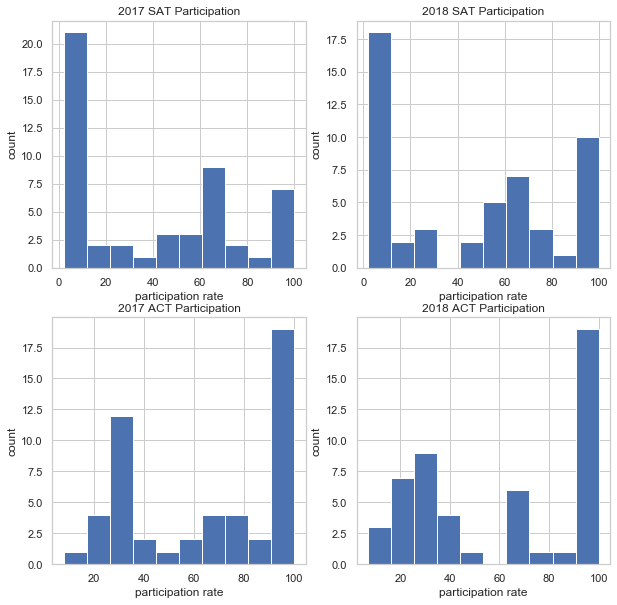

In [75]:
list_of_xlabels = 'participation rate'
list_of_columns = ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']
list_of_titles = ['2017 SAT Participation', '2018 SAT Participation', '2017 ACT Participation', '2018 ACT Participation']
subplot_histograms(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

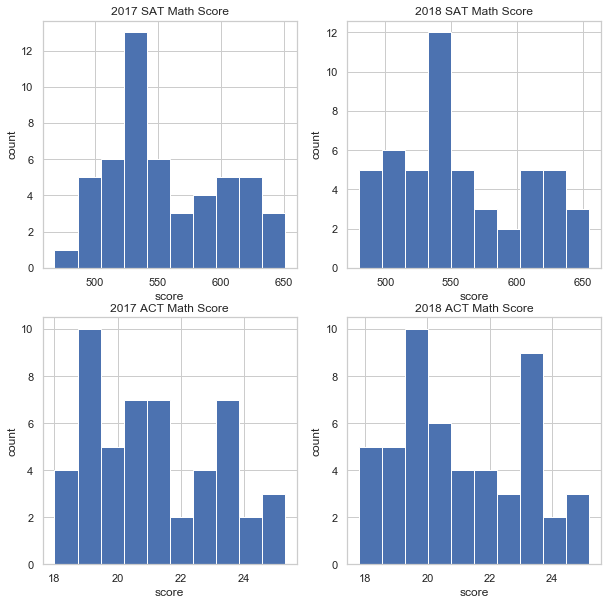

In [76]:
list_of_xlabels = 'score'
list_of_columns = ['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math']
list_of_titles = ['2017 SAT Math Score', '2018 SAT Math Score', '2017 ACT Math Score', '2018 ACT Math Score']
subplot_histograms(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

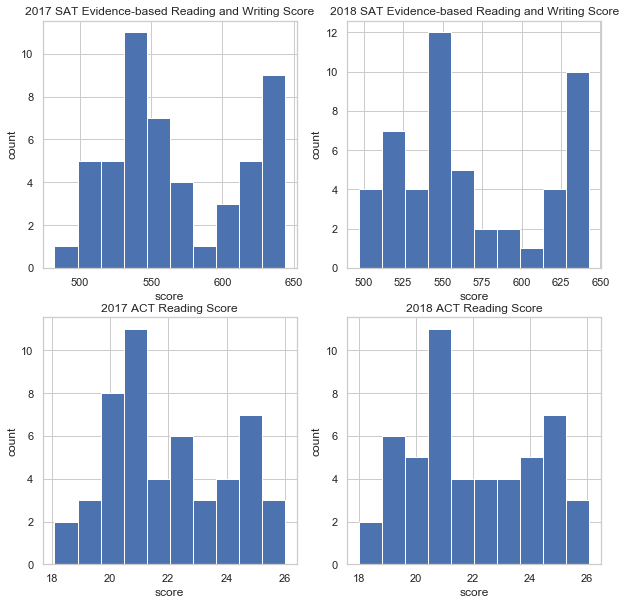

In [77]:
list_of_xlabels = 'score'
list_of_columns = ['sat_2017_evidence-based_reading_and_writing', 'sat_2018_evidence-based_reading_and_writing', 'act_2017_reading', 'act_2018_reading']
list_of_titles = ['2017 SAT Evidence-based Reading and Writing Score', '2018 SAT Evidence-based Reading and Writing Score', '2017 ACT Reading Score' , '2018 ACT Reading Score']
subplot_histograms(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

In [107]:
### It's difficult to compare across SAT scores when the two plots don't share the same x-axis scaling.
### Scaling should be consistent for comparison to be meaningful.
### The additional kwarg (keyword argument) that needs to be specified in the function
### should be plt.subplots(..., sharex='row') for it to share the x-axes across subplot rows.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


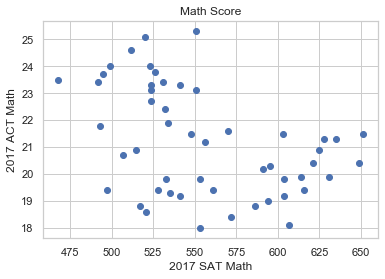

In [108]:
x = ACT_SAT_final['sat_2017_math']   ### You could have written a function to save time
y = ACT_SAT_final['act_2017_math']   ### seaborn 0.90 has a function that pretty much does the same thing.
colors = ['b']                       ### sns.scatterplot(x,y)
plt.scatter(x, y, c=colors, alpha=1)
plt.title('Math Score')
plt.xlabel('2017 SAT Math')
plt.ylabel('2017 ACT Math')
plt.show()

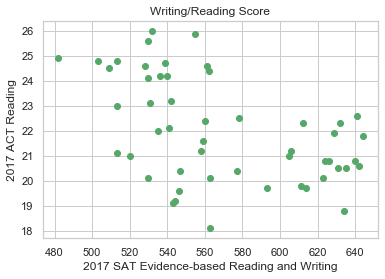

In [109]:
x = ACT_SAT_final['sat_2017_evidence-based_reading_and_writing']
y = ACT_SAT_final['act_2017_reading']
colors = ['g']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('Writing/Reading Score')
plt.xlabel('2017 SAT Evidence-based Reading and Writing')
plt.ylabel('2017 ACT Reading')
plt.show()

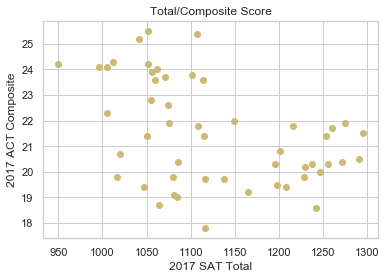

In [110]:
x = ACT_SAT_final['sat_2017_total']
y = ACT_SAT_final['act_2017_composite']
colors = ['y']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('Total/Composite Score')
plt.xlabel('2017 SAT Total')
plt.ylabel('2017 ACT Composite')
plt.show()

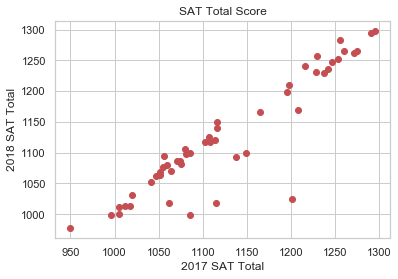

In [111]:
#Total scores for SAT 2017 vs. 2018
x = ACT_SAT_final['sat_2017_total']
y = ACT_SAT_final['sat_2018_total']
colors = ['r']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('SAT Total Score')
plt.xlabel('2017 SAT Total')
plt.ylabel('2018 SAT Total')
plt.show()

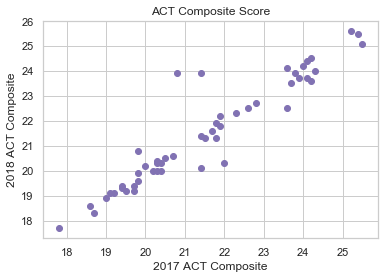

In [112]:
#Composite scores for ACT 2017 vs. 2018
x = ACT_SAT_final['act_2017_composite']
y = ACT_SAT_final['act_2018_composite']
colors = ['m']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('ACT Composite Score')
plt.xlabel('2017 ACT Composite')
plt.ylabel('2018 ACT Composite')
plt.show()

In [ ]:
### Correct, but drawing a act_comp_2018 = act_comp_201 y=x line and annotating the outliers would help with 
### the visualisation. States in the region above would have act_comp_2018 > act_comp_2017. Annotation can be
### done using matplotlib.pyplot.annotate (see documentation).

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [113]:
def box_plot(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(10,10)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].boxplot(dataframe[column], patch_artist=True) 
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])
    return plt.show()

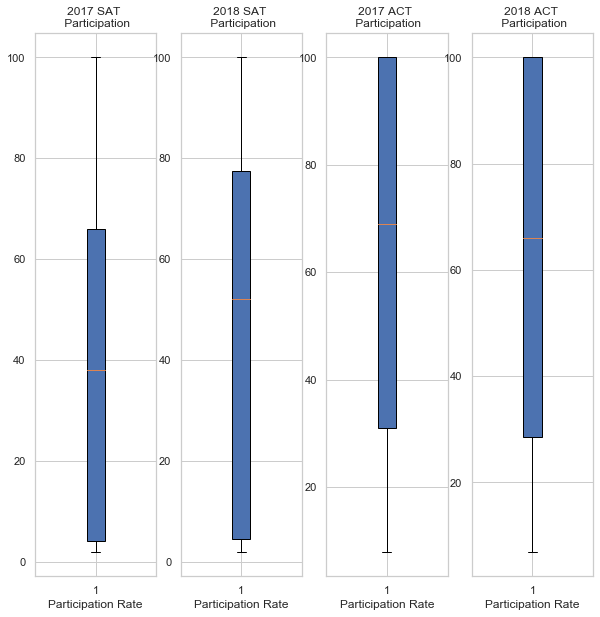

In [114]:
list_of_xlabels = ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate']
list_of_columns = ['sat_2017_participation', 'sat_2018_participation','act_2017_participation','act_2018_participation']
list_of_titles = ['2017 SAT \n Participation', '2018 SAT \n Participation', '2017 ACT \n Participation', '2018 ACT \n Participation' ]
box_plot(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

In [ ]:
### The box plots here should all share the same axis, since they have the same range from zero to one. Sharing 
### a common axis also alleviates the problem where the axis ticks keep appearing between the subplots and the 
### multiple X-axis labels. Also neceessary to remove the '1' above Participation Rate

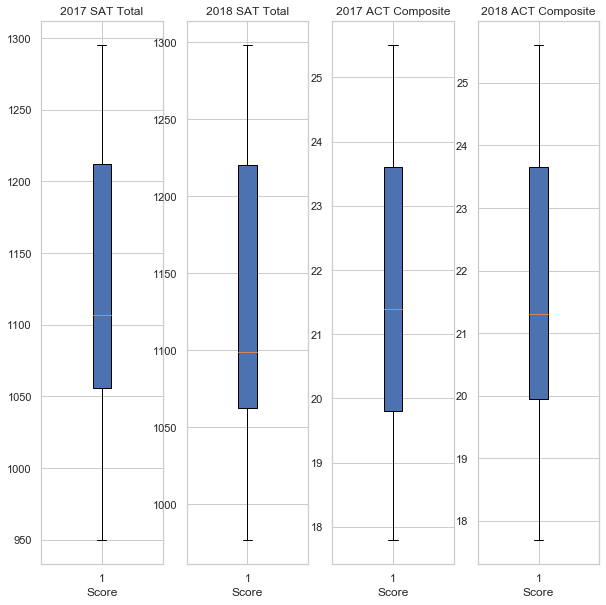

In [115]:
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
list_of_columns = ['sat_2017_total', 'sat_2018_total','act_2017_composite','act_2018_composite']
list_of_titles = ['2017 SAT Total', '2018 SAT Total', '2017 ACT Composite', '2018 ACT Composite']
box_plot(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

In [ ]:
### Not very meaningful to compare SAT and ACT scores across subplots since they are on vastly different scales. 
### Similar issues to abovementioned, except that the lack of a shared axes makes the SAT score plots look

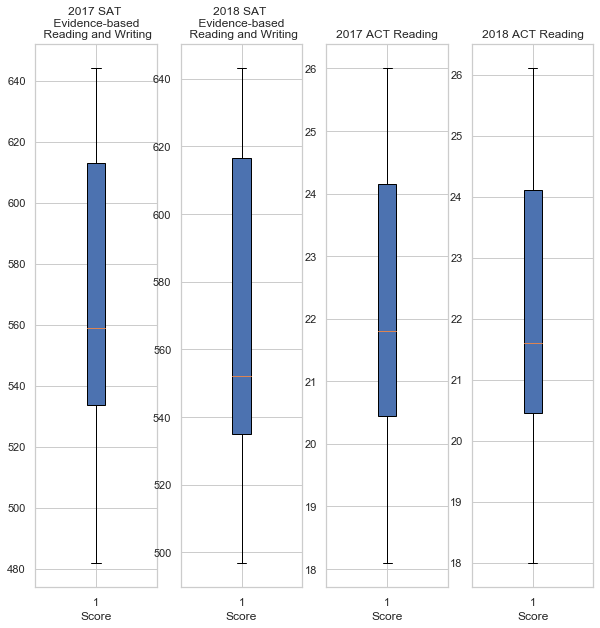

In [116]:
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
list_of_columns = ['sat_2017_evidence-based_reading_and_writing', 'sat_2018_evidence-based_reading_and_writing','act_2017_reading', 'act_2018_reading']
list_of_titles = ['2017 SAT \n Evidence-based \n Reading and Writing', '2018 SAT \n Evidence-based \n Reading and Writing', '2017 ACT Reading', '2018 ACT Reading']

box_plot(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

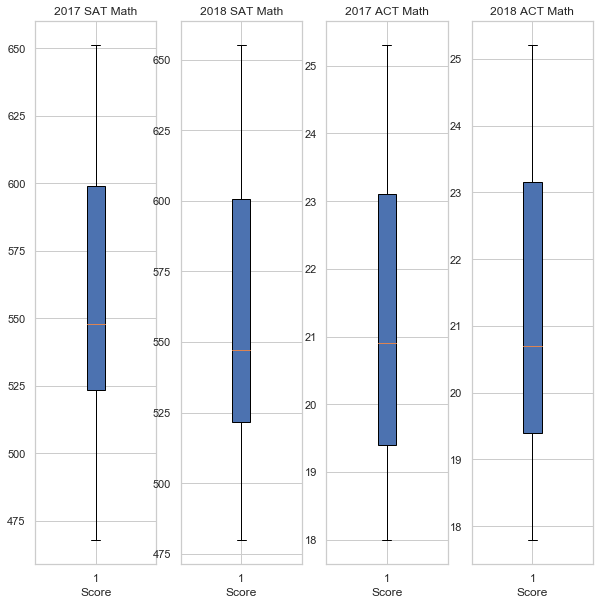

In [117]:
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
list_of_columns = ['sat_2017_math', 'sat_2018_math','act_2017_math','act_2018_math']
list_of_titles = ['2017 SAT Math', '2018 SAT Math', '2017 ACT Math', '2018 ACT Math']
box_plot(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

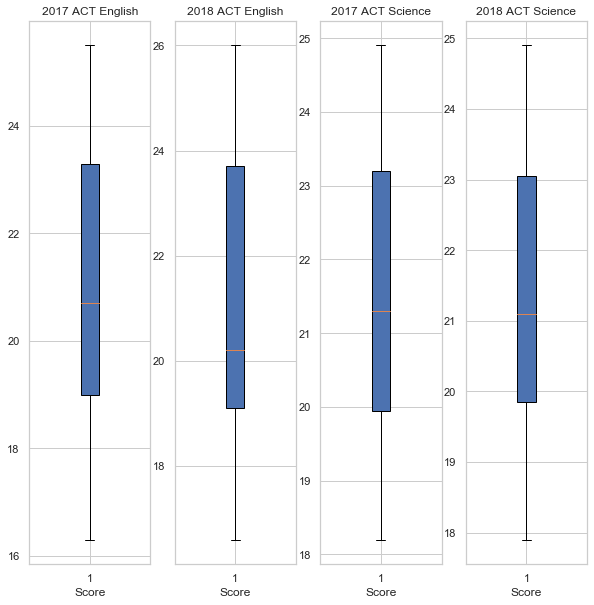

In [118]:
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
list_of_columns = ['act_2017_english', 'act_2018_english','act_2017_science','act_2018_science']
list_of_titles = ['2017 ACT English', '2018 ACT English', '2017 ACT Science', '2018 ACT Science']
box_plot(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

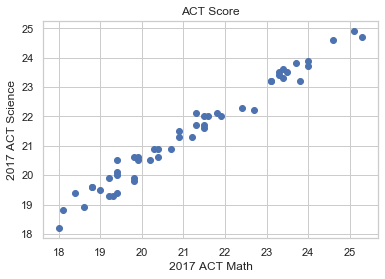

In [119]:
#Scatterplot to investigate relationship between 2017 ACT math and science scores. 
#Plot shows that there is a positive linear relationship, hence students who generally do well for ACT math also do well for ACT science.
x = ACT_SAT_final['act_2017_math']
y = ACT_SAT_final['act_2017_science']
colors = ['b']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('ACT Score')
plt.xlabel('2017 ACT Math')
plt.ylabel('2017 ACT Science')
plt.show()


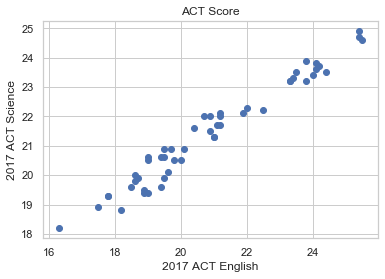

In [120]:
#Scatterplot to investigate relationship between 2017 ACT english and science scores. 
#Plot shows that there is a positive linear relationship, hence students who generally do well for ACT english also do well for ACT science.
x = ACT_SAT_final['act_2017_english']
y = ACT_SAT_final['act_2017_science']
colors = ['b']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('ACT Score')
plt.xlabel('2017 ACT English')
plt.ylabel('2017 ACT Science')
plt.show()

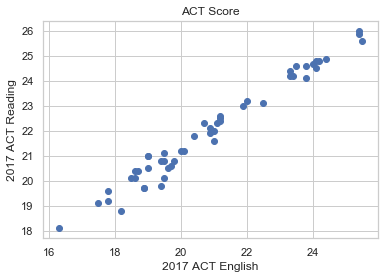

In [121]:
#Scatterplot to investigate relationship between 2017 ACT english and science scores. 
#Plot shows that there is a positive linear relationship, hence students who generally do well for ACT english also do well for ACT science.
x = ACT_SAT_final['act_2017_english']
y = ACT_SAT_final['act_2017_reading']
colors = ['b']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('ACT Score')
plt.xlabel('2017 ACT English')
plt.ylabel('2017 ACT Reading')
plt.show()

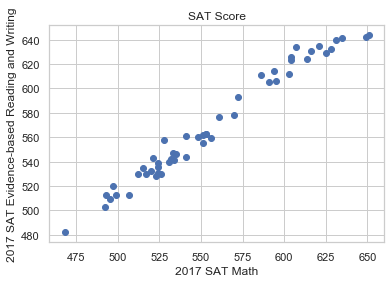

In [122]:
#Scatterplot to investigate relationship between 2017 SAT Math and Evidence-based reading and writing scores. 
#Plot shows that there is a positive linear relationship, hence students who generally do well for SAT math also do well for SAT Evidence-based Reading and Writing.
x = ACT_SAT_final['sat_2017_math']
y = ACT_SAT_final['sat_2017_evidence-based_reading_and_writing']
colors = ['b']
plt.scatter(x, y, c=colors, alpha=1)
plt.title('SAT Score')
plt.xlabel('2017 SAT Math')
plt.ylabel('2017 SAT Evidence-based Reading and Writing')
plt.show()

Text(0, 0.5, 'Participation Rate Change')

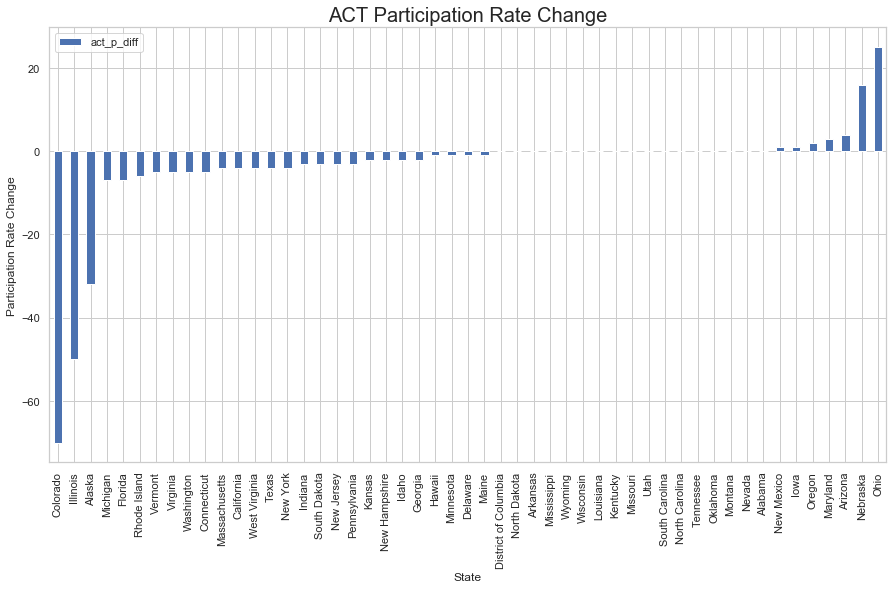

In [123]:
#Understand how participation rates change for ACT, per state.
#ACT_SAT_final['act_p_diff'] = ACT_SAT_final['act_2018_participation'].sub(ACT_SAT_final['act_2017_participation'], axis = 0)
ACT_SAT_final['act_p_diff'] = ACT_SAT_final['act_2018_participation']-ACT_SAT_final['act_2017_participation']
ACT_SAT_final.sort_values('act_p_diff', ascending=True, inplace=True)
ACT_SAT_final.plot(x='state', y='act_p_diff', kind='bar', figsize=(15,8))
plt.title('ACT Participation Rate Change', size=20)
plt.xlabel('State')
plt.ylabel('Participation Rate Change')

In [124]:
### Please don't produce visualisations like these. Select the things you want to highlight and discard the rest,
### otherwise the plot becomes extremely cluttered. Maybe Min/Max/Median/Mean + 2/3 states of interest.
### You definitely don't want to plot everything here.

Text(0, 0.5, 'Participation Rate Change')

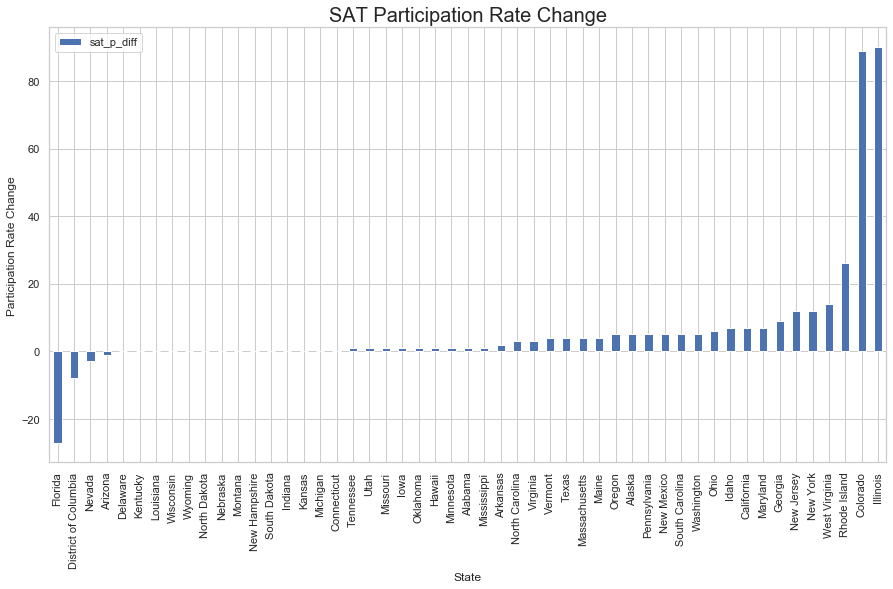

In [125]:
#Understand how participation rates change for SAT, per state.
ACT_SAT_final['sat_p_diff'] = ACT_SAT_final['sat_2018_participation']-ACT_SAT_final['sat_2017_participation']
ACT_SAT_final.sort_values('sat_p_diff', ascending=True, inplace=True)
ACT_SAT_final.plot(x='state', y='sat_p_diff', kind='bar', figsize=(15,8))
plt.title('SAT Participation Rate Change', size=20)
plt.xlabel('State')
plt.ylabel('Participation Rate Change')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [126]:
ACT_SAT_final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,...,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_p_diff,sat_p_diff
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,...,20.988235,21.125490,22.015686,21.345098,45.745098,567.294118,557.254902,1124.666667,-3.607843,5.941176
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,...,2.446356,2.035765,2.167245,1.870114,37.314256,45.317676,48.887562,93.868561,13.447793,18.271740
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,...,16.600000,17.800000,18.000000,17.900000,2.000000,497.000000,480.000000,977.000000,-70.000000,-27.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,...,19.100000,19.400000,20.450000,19.850000,4.500000,535.000000,521.500000,1062.500000,-4.000000,0.000000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,...,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,547.000000,1099.000000,-1.000000,1.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,...,23.700000,23.150000,24.100000,23.050000,77.500000,616.500000,600.500000,1220.000000,0.000000,5.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,...,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000,25.000000,90.000000


In [161]:
### if you had instead called ACT_SAT_final.describe().T (the transpose of the DataFrame), the results would have 
### been much easier to read

In [127]:
ACT_SAT_final[['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']].median()

sat_2017_participation    38.0
sat_2018_participation    52.0
act_2017_participation    69.0
act_2018_participation    66.0
dtype: float64

In [128]:
ACT_SAT_final[['sat_2017_total', 'sat_2018_total', 'act_2017_composite', 'act_2018_composite']].median()

sat_2017_total        1107.0
sat_2018_total        1099.0
act_2017_composite      21.4
act_2018_composite      21.3
dtype: float64

In [129]:
ACT_SAT_final[['sat_2017_evidence-based_reading_and_writing', 'sat_2018_evidence-based_reading_and_writing', 'act_2017_reading', 'act_2018_reading']].median()

sat_2017_evidence-based_reading_and_writing    559.0
sat_2018_evidence-based_reading_and_writing    552.0
act_2017_reading                                21.8
act_2018_reading                                21.6
dtype: float64

In [130]:
ACT_SAT_final[['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math']].median()

sat_2017_math    548.0
sat_2018_math    547.0
act_2017_math     20.9
act_2018_math     20.7
dtype: float64

In [131]:
ACT_SAT_final[['act_2017_english', 'act_2017_science', 'act_2018_english', 'act_2018_science']].median()

act_2017_english    20.7
act_2017_science    21.3
act_2018_english    20.2
act_2018_science    21.1
dtype: float64

Answers:

What we know: 
Symmetric distributions are when mean = mode = median
Left Skew is when mean < median 
Right Skew is median < mean

From the above table, we can summarize the following observations:

2017 SAT Participation Rate is right skewed meaning that participation is low.
Median = 38.0, Mean = 39.80 so Median < Mean

2018 SAT Participation Rate is left skewed meaning that participation is high.
Median = 52.0, Mean = 45.75, so Mean < Median

2017 ACT Participation Rate is left skewed meaning that participation is high.
Median = 69.0, Mean = 65.25, so Mean < Median

2018 ACT Participation Rate is left skewed meaning that participation is high.
Median = 66.0, Mean = 61.65, so Mean < Median


2017 SAT Total score is right skewed.
Median = 1107.0, Mean = 1126.10, so Median < Mean 

2018 SAT Total score is right skewed.
Median = 1099.0, Mean = 1124.67, so Median < Mean

2017 ACT Composite score is close to normal distribution.
Median = 21.4, Mean = 21.52, so Median ~ Mean

2018 ACT Composite score is right skewed.
Median = 21.3, Mean = 21.50, so Median < Mean


2017 SAT Evidence-based Reading and Writing score is right skewed.
Median = 559.0, Mean = 569.12, so Median < Mean

2018 SAT Evidence-based Reading and Writing score is right skewed.
Median = 552.0, Mean = 567.29, so Median < Mean

2017 ACT Reading score is right skewed.
Median = 21.8, Mean = 22.01, so Median < Mean

2018 ACT Reading score is right skewed.
Median = 21.6, Mean = 22.02, so Median < Mean


2017 SAT Math score is right skewed.
Median = 548.0, Mean = 556.88, so Median < Mean.

2018 SAT Math Score is right skewed.
Median = 547.0, Mean = 557.25, so Median < Mean.

2017 ACT Math Score is right skewed.
Median = 20.9, Mean = 21.18, so Median < Mean

2018 ACT Math Score is right skewed.
Median = 20.7, Mean = 21.12, so Median < Mean


2017 ACT English Score is right skewed.
Median = 20.7, Mean = 20.93, so Median < Mean

2017 ACT Science Score is close to normal distribution.
Median = 21.3, Mean = 21.45, so Median ~ Mean.

2018 ACT English Score is right skewed.
Median = 20.2, Mean = 20.99, o Median < Mean

2018 ACT Science Score is right skewed.
Median = 21.1, Mean = 21.35, so Median < Mean

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: This trend is not observed.

In [132]:
### Might want to prove this a bit more rigorously. Try Shapiro-Wilk to test for normality.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 

Math scores for 2017 SAT, 2018 SAT and 2017 ACT are all right skewed as their median is smaller than mean.

Reading score for 2017 ACT is approximately normally distributed. Evidence-based Reading and Writing scores for 2017 SAT and 2018 SAT are right skewed as their median is smaller than mean.

Participation rate for 2017 SAT is right skewed as the median is smaller than mean. Participation rate for 2018 SAT, 2017 ACT and 2018 ACT are left skewed as their median is larger than mean.


Usually, the data obtained from the sample is used to learn about the population, especially using the sample mean to estimate the mean of the population.  If all possible sample means are normally distributed, we can use the normal distribution with the sample mean to conduct inference on the population mean.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

As we are obtaining data from the states, we lack the granular details on the schools within each estate or district in each state. We would have a much larger data set if we obtain data from the schools in each estate or district per state. This would improve the relationship accuracy between population size and participation rate, as well as their mean individual subject and total/composite scores.

As the sample size is larger, this would mean the distribution of the sample means would approach normal distribution, as defined by the central limit theorem. Hence, greater granularity is required for more meaningful conduct of statistical inference.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

It is not appropriate to compare SAT and ACT math scores because the SAT and ACT math score ranges are different. 
The scatterplot for 2017 ACT Math vs 2017 SAT Math scores also shows insignificant correlation.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [133]:
# Compare 2017 SAT and 2017 ACT Participation rates.
# Two sample t-test 

# H0 (null hypothesis):         μ_SAT_17 = μ_ACT_17   
# HA:(alternative hypothesis):  μ_SAT_17 ≠ μ_ACT_17
from scipy import stats
stats.ttest_ind(ACT_SAT_final['sat_2017_participation'], ACT_SAT_final['act_2017_participation'])

# p is 8.69e-0.5, alpha is 0.05
# As p < alpha, we reject the null hypothesis and conclude the alternative hypothesis to be true.

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

In [102]:
# Compare 2018 SAT and 2017 ACT Participation rates.
# Two sample t-test 

# H0 (null hypothesis):         μ_SAT_18 = μ_ACT_18   
# HA:(alternative hypothesis):  μ_SAT_18 ≠ μ_ACT_18

stats.ttest_ind(ACT_SAT_final['sat_2018_participation'], ACT_SAT_final['act_2018_participation'])

# p is 0.016, alpha is 0.05
# As p < alpha, we reject the null hypothesis and conclude the alternative hypothesis to be true.

Ttest_indResult(statistic=-2.2471737667351626, pvalue=0.026826308222090527)

In [ ]:
### You can certainly perform the t-test, but I'm not sure if H0: μ_SAT_18 = μ_ACT_18 is a good null hypothesis. 
### There doesn't seem to be a compelling reason why we should assume that they were equal in the first place.
### If anything, they are complementary.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [103]:
ACT_SAT_final = ACT_SAT_final.sort_values(by=['sat_2017_participation','state'], ascending = True)
ACT_SAT_final.head(5)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_p_diff,sat_p_diff
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,21.0,21.2,22.5,22.0,3,634,631,1265,1,1
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,18.2,18.1,18.9,18.6,3,630,606,1236,0,1
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,19.1,20.3,20.7,20.5,2,640,643,1283,0,0
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,19.1,18.9,19.7,19.4,5,592,576,1169,0,2
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,20.2,21.4,21.7,21.4,4,643,655,1298,-1,1


In [104]:
ACT_SAT_final = ACT_SAT_final.sort_values(by='sat_2018_participation', ascending = True)
ACT_SAT_final.head(5)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_p_diff,sat_p_diff
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,...,19.1,20.3,20.7,20.5,2,640,643,1283,0,0
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,21.0,21.2,22.5,22.0,3,634,631,1265,1,1
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,18.2,18.1,18.9,18.6,3,630,606,1236,0,1
50,Wyoming,100,19.4,19.8,20.8,20.6,20.2,3,626,604,...,19.0,19.7,20.6,20.3,3,633,625,1257,0,0
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,...,19.4,19.8,20.4,20.1,3,629,623,1252,16,0


In [105]:
ACT_SAT_final[(ACT_SAT_final['sat_2017_participation']<50) 
              & (ACT_SAT_final['sat_2018_participation']<50) 
              & (ACT_SAT_final['act_2017_participation']<50) 
              & (ACT_SAT_final['act_2018_participation']<50)]
 

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_p_diff,sat_p_diff
37,Oregon,40,21.2,21.5,22.4,21.7,21.8,43,560,548,...,20.6,20.9,21.9,21.1,48,564,553,1117,2,5


Answer:

3 states with interesting trends:

1. Illinois. This state has the greatest SAT participation rate increase from 2017 to 2018, and the second greatest ACT participation rate decrease from 2017 to 2018 (refer to SAT Participation Rate Change, ACT Participation Rate Change graphs). This is because Illinois awarded a multi-million dollar contract to the College Board, which runs SAT exams, in 2018 (refer to link below). Hence, schools in Illinois began administering the SAT to students as the SAT is now a more recognised college entrance exam, resulting in a sharp increase in participation rate. As such, fewer schools administer the ACT, which explains the sharp decrease in participation rate.

"Illinois has embraced the SAT, and the ACT is mad about it", (Elaine Chen, Jul 2018), https://www.chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/


2. Colorado. This state has the second greatest SAT participation rate increase from 2017 to 2018, and the greatest ACT participation rate decrease from 2017 to 2018 (refer to SAT Participation Rate Change, ACT Participation Rate Change graphs). This is because in 2017, Colorado made the SAT compulsory for college application and has since been made a statewide high school accountability (refer to link below). Hence, this explains a sharp increase in SAT participation rate from 2017 to 2018 and a sharp decline in ACT participation rate from 2017 to 2018.

"Colorado Changed to the SAT in 2017: What You Need to Know", (Daniel Wheeler, Jan 2017), https://www.testive.com/colorado-sat-change-2017/


3. Oregon. This state has the lowest SAT and ACT participation rates in both 2017 and 2018 combined. This could be due to the fact that in 2017, Western Oregon announced that it no longer requires SAT nor ACT test scores for admission (refer to link below).


"Western Oregon no longer requires SAT, ACT", (Natalie Pate, Nov 2016), https://www.statesmanjournal.com/story/news/education/2016/11/17/western-oregon-no-longer-requires-sat-act-scores/93505778/

In [134]:
sat_17_withstudpop = pd.read_csv('./sat_2017_withstudpop.csv')
sat_18_withstudpop = pd.read_csv('./sat_2018_withstudpop.csv')

In [135]:
sat_1718_withstudpop = pd.merge(sat_17_withstudpop, sat_18_withstudpop, on='state')

In [136]:
sat_1718_withstudpop.head(5)

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,sat_2017_no_of_sat_takers,sat_2017_high_school_graduates,sat_2017_percentage,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,sat_2018_no_of_sat_takers,sat_2018_high_school_graduates,sat_2018_percentage
0,Alabama,5%,593,572,1165,2393,49102,0.048735,6%,595,571,1166,2878,49844,0.057740
1,Alaska,38%,547,533,1080,2971,7770,0.382368,43%,562,544,1106,3334,7796,0.427655
2,Arizona,30%,563,553,1116,20466,67909,0.301374,29%,577,572,1149,20188,68627,0.294170
3,Arkansas,3%,614,594,1208,1065,30904,0.034462,5%,592,576,1169,1591,31126,0.051115
4,California,53%,531,524,1055,226699,425864,0.532327,60%,540,536,1076,262228,435365,0.602318


In [137]:
#top 3 states with highest untapped potential i.e. potential amount of students who have yet to take SAT
#formula: student population size* (1-percentage of students who took SAT).
sat_1718_withstudpop['sat_2017_untapped_potential'] = (sat_1718_withstudpop['sat_2017_high_school_graduates'])*(1-sat_1718_withstudpop['sat_2017_percentage'])
sat_1718_withstudpop = sat_1718_withstudpop.sort_values('sat_2017_untapped_potential',ascending = False)


In [ ]:
### I'm a bit worried about defining this USP metric. It seems quite arbitrary and should be rigorously justified before
### using it to measure anything.

In [138]:
sat_1718_withstudpop[['state','sat_2017_untapped_potential']].head(3)

,state,sat_2017_untapped_potential
4,California,199164.999930
43,Texas,124041.999955
35,Ohio,108529.999946


In [139]:
sat_1718_withstudpop['sat_2018_untapped_potential'] = (sat_1718_withstudpop['sat_2018_high_school_graduates'])*(1-sat_1718_withstudpop['sat_2018_percentage'])
sat_1718_withstudpop = sat_1718_withstudpop.sort_values('sat_2018_untapped_potential',ascending = False)


In [140]:
sat_1718_withstudpop[['state','sat_2018_untapped_potential']].head(3)

,state,sat_2018_untapped_potential
4,California,173136.999817
43,Texas,115239.000076
35,Ohio,101481.000052


In [141]:
sat_1718_withstudpop['sat_1718_untapped_potential'] = sat_1718_withstudpop['sat_2017_untapped_potential'] + sat_1718_withstudpop['sat_2018_untapped_potential'] 
sat_1718_withstudpop = sat_1718_withstudpop.sort_values('sat_1718_untapped_potential',ascending = False)

In [142]:
sat_1718_withstudpop[['state','sat_1718_untapped_potential']].head(3)

,state,sat_1718_untapped_potential
4,California,372301.999748
43,Texas,239281.000031
35,Ohio,210010.999998


Identified California as the state with the highest student untapped potential.

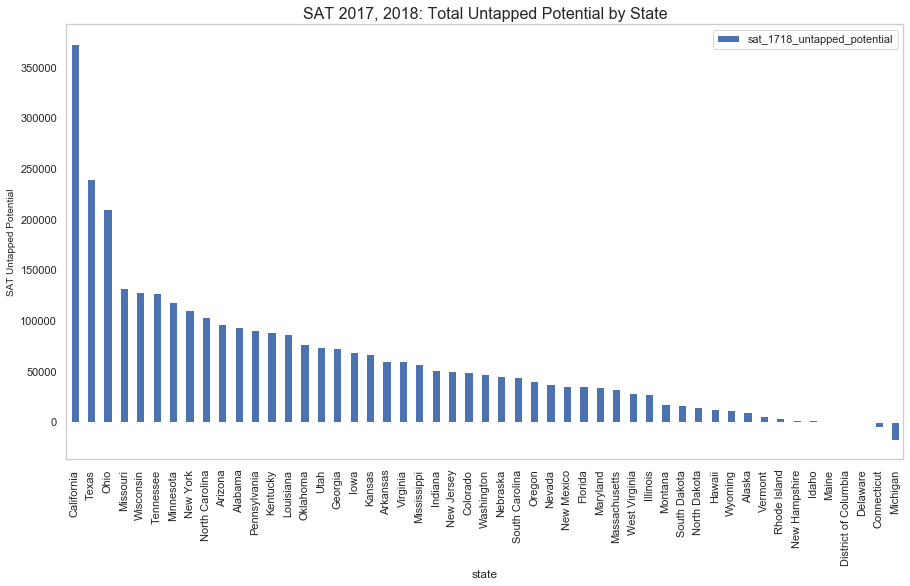

In [143]:
sat_1718_withstudpop.plot(x='state', y='sat_1718_untapped_potential', kind='bar', figsize=(15,8))
plt.ylabel('SAT Untapped Potential', fontsize=10)
plt.title('SAT 2017, 2018: Total Untapped Potential by State', fontsize = 16)
plt.grid(b=None)

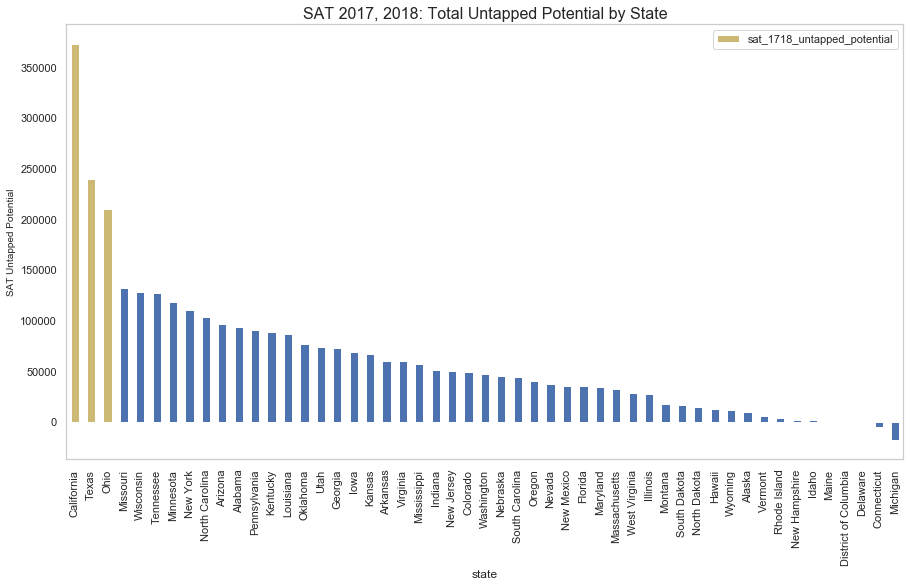

In [144]:
colors = ['y','y','y','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b', 'b']
sat_1718_withstudpop.plot(x='state', y='sat_1718_untapped_potential', kind='bar', figsize=(15,8), color = colors)
plt.ylabel('SAT Untapped Potential', fontsize=10)
plt.title('SAT 2017, 2018: Total Untapped Potential by State', fontsize = 16)
plt.grid(b=None)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Number of SAT Takers')

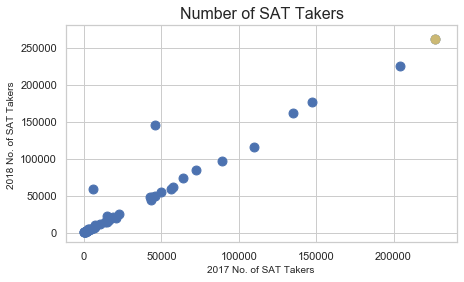

In [145]:
#Explore the relationship between No. of SAT Takers in 2017 vs 2018.
#Strong Positive Correlation.
sat_1718_withstudpop.plot(x='sat_2017_no_of_sat_takers', y='sat_2018_no_of_sat_takers', kind='scatter', figsize=(7,4), s=80)
plt.scatter(x=226699, y=262228, color="y", s=80) #data point for California
                                                ### Would be helpful to annotate as well. Annotation can be
                                                ### done using matplotlib.pyplot.annotate (see documentation).
plt.ylabel('2018 No. of SAT Takers ', fontsize=10)
plt.xlabel('2017 No. of SAT Takers ', fontsize=10)
plt.title('Number of SAT Takers', fontsize = 16)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, '2017 SAT Total Score ')

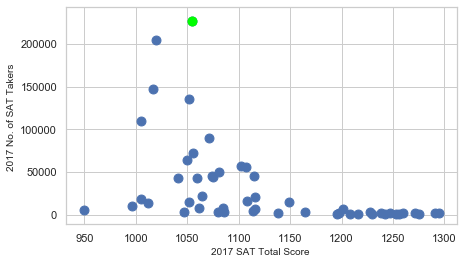

In [146]:
#Explore the relationship between number of SAT takers and their total score.
sat_1718_withstudpop.plot(x='sat_2017_total', y='sat_2017_no_of_sat_takers', kind='scatter', figsize=(7,4), s=80)
plt.scatter(x=1055, y=226699, color="lime", s=80) 
plt.ylabel('2017 No. of SAT Takers ', fontsize=10)
plt.xlabel('2017 SAT Total Score ', fontsize=10)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, '2018 SAT Total Score ')

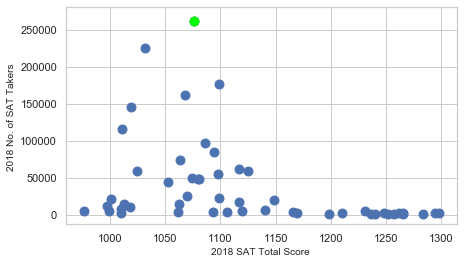

In [147]:
#Explore the relationship between number of SAT takers and their total score.
sat_1718_withstudpop.plot(x='sat_2018_total', y='sat_2018_no_of_sat_takers', kind='scatter', figsize=(7,4), s=80)
plt.scatter(x=1076, y=262228, color="lime", s=80) 
plt.ylabel('2018 No. of SAT Takers ', fontsize=10)
plt.xlabel('2018 SAT Total Score ', fontsize=10)

## Conclusions and Recommendations

Based on your exploration of the data, what are your key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Answer: 

Key takeaways: 

The above dataframes show me which states have the highest participation rates, lowest participation rates, and largest change in participation rates. This gives us insights into the states which embraces the ACT and/or SAT, as well as the states which were affected by state decisions to review the ACT and/or SAT. For example, Florida, Georgia and Hawaii experience the highest SAT and ACT participation rates in both 2017 and 2018, while Oregon experience the lowest SAT and ACT participation rates in 2017 and 2018. Illinois and Colorado experience the greatest change in participation rate for SAT and ACT from 2017 to 2018.

The scatterplots also show me that students who perform well in one subject, also perform well in the rest of the subjects, for ACT and SAT. The difficulty of the individual subject exams can also be seen from the distribution i.e. right skewed, left skewed or normal distribution. The box plot also gives us insights on the range of scores for the individual subjects. 

Recommendations: 
More effort should be pumped in to boost participation rates in low participating states such as Oregon. This could include understanding how other states induce high participation rates and adopting their approach, and reviewing the difficulty of the ACT/SAT subject tests, because high level of difficulty may act as a deterrence for students to sit for the exam. 


State with low participation rate: North Dakota 

North Dakota has 2% SAT participation rate in both 2017 and 2018, making this state the lowest SAT participation rate for both years.

To increase participation rate, the state could mandate the completion of SAT and ACT for all high school students, or provide subsidy/funding to students who are interested to take the SAT and/or ACT exam.


Additional data for more informed investigations:
- SAT/ACT scores and participation rates for districts within each state. With a larger dataset, this would provide me greater granularity on the relationship between population size and participation rate, and the relationship between population size and scores.
- number of attempts at SAT/ACT (this is because College Board places no restrictions on how many times students can take the SAT or ACT). I would then explore the correlation between the student score and their number of attempts.
- total high school student population in each state. This is because it would be more useful to prioritize on improving participation rates in states with large student population, especially states with large student untapped potential i.e. large number of students who have yet to take the SAT. 
